In [2]:
# Cell 1 — imports and workspace checks
import os
import sys
import pandas as pd        # <- this fixes the NameError
import numpy as np

print("Python:", sys.version.splitlines()[0])
print("Working dir:", os.getcwd())
print("Files in working dir (top 50):")
print("\n".join(os.listdir(".")[:50]))


Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Working dir: C:\Users\abdis\OneDrive\Desktop\PLP assignments\Python Assignments\python_week8
Files in working dir (top 50):
.git
.ipynb_checkpoints
Analysis.ipynb
cord19_metadata_sample_5000.csv
Framework_Assignment
LICENSE


In [3]:
# Cell 2 — safe load with helpful error handling
csv_path = "cord19_metadata_sample_5000.csv"   # change if you saved a different name
# Example of an absolute path on Windows:
# csv_path = r"C:\Users\YourName\Downloads\cord19_metadata_sample_5000.csv"

print("Trying to load:", csv_path)
try:
    df = pd.read_csv(csv_path, low_memory=False)
    print("Loaded OK — shape:", df.shape)
    display(df.head(5))
except FileNotFoundError:
    print("FileNotFoundError: The file wasn't found in the current folder.")
    print(" - Confirm file is in the folder printed by os.getcwd() above.")
    print(" - Or set csv_path to the full absolute path to the file.")
except PermissionError:
    print("PermissionError: Python can't open the file. Close Excel/Notepad or move the file to Documents or Desktop.")
    print("You can also run your notebook as Administrator, but moving the file is easier.")
except Exception as e:
    print("Other error while loading:", type(e).__name__, str(e))
    raise


Trying to load: cord19_metadata_sample_5000.csv
Loaded OK — shape: (5000, 11)


,cord_uid,title,abstract,publish_time,year,authors,journal,source_x,doi,abstract_word_count,title_word_count
0,c3329a03-efae-48a2-87eb-93adcb097e2f,Pandemic rapid investigation of trends : impli...,The investigation evaluates the effectiveness ...,2021-03-11,2021,Barbara Martinez; Michael Lopez; Robert Smith,Unknown,medRxiv,10.0000/910620.396,89,9
1,9c17f9cc-4d9b-4545-b131-1b0f063351fe,Coronavirus preliminary study of effectiveness,Our analysis assesses outcomes for immunity in...,2019-10-21,2019,Richard Garcia; Linda Williams; Jessica Johnso...,Unknown,medRxiv,10.0000/930555.796,89,5
2,71140558-098a-453e-af27-e494860c3895,Modeling comparative survey of effectiveness,The investigation investigates the effectivene...,2018-08-20,2018,James Johnson; Barbara Anderson; Elizabeth Bro...,Frontiers in Medicine,PMC,10.0000/189814.849,72,5
3,f632b8d9-02ec-48ba-b0ae-b2f6b9ff05c1,Serology comparative impact of outcomes : impl...,This study investigates the effectiveness of m...,2022-07-03,2022,Michael Rodriguez; John Lopez; Jessica Brown; ...,Clinical Infectious Diseases,medRxiv,10.0000/198907.199,78,10
4,d55a45db-e0c4-4d53-a109-a17bd3b19740,Modeling global survey of effectiveness,We evaluates the impact of outcomes in clinica...,2019-09-29,2019,Jessica Williams; Michael Jones; Michael Smith...,Nature,Publisher,10.0000/599948.614,93,5


In [4]:
# Cell 3 — basic cleaning and quick checks
# If publish_time exists, convert to datetime
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    if 'year' not in df.columns:
        df['year'] = df['publish_time'].dt.year

# Add derived counts if not present
if 'abstract_word_count' not in df.columns:
    df['abstract_word_count'] = df.get('abstract', "").fillna("").apply(lambda t: len(str(t).split()))
if 'title_word_count' not in df.columns:
    df['title_word_count'] = df.get('title', "").fillna("").apply(lambda t: len(str(t).split()))

print("Columns now:", df.columns.tolist())
print("Sample years present (sorted):", sorted(df['year'].dropna().unique())[:10])
print("Top journals (sample):")
print(df['journal'].fillna("Unknown").value_counts().head(10))


Columns now: ['cord_uid', 'title', 'abstract', 'publish_time', 'year', 'authors', 'journal', 'source_x', 'doi', 'abstract_word_count', 'title_word_count']
Sample years present (sorted): [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Top journals (sample):
journal
Journal of Infectious Diseases    511
Nature                            469
BMJ                               465
medRxiv                           452
bioRxiv                           448
Frontiers in Medicine             448
The Lancet                        448
PLOS ONE                          443
Clinical Infectious Diseases      440
Unknown                           439
Name: count, dtype: int64


In [5]:
# Basic info
print("Shape (rows, cols):", df.shape)
print("\nColumn data types:")
print(df.dtypes)

# Missing values per column
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False).head(15))

# Quick stats (numerical)
print("\nSummary statistics:")
print(df.describe(include="all").T.head(15))


Shape (rows, cols): (5000, 11)

Column data types:
cord_uid                       object
title                          object
abstract                       object
publish_time           datetime64[ns]
year                            int64
authors                        object
journal                        object
source_x                       object
doi                            object
abstract_word_count             int64
title_word_count                int64
dtype: object

Missing values per column:
cord_uid               0
title                  0
abstract               0
publish_time           0
year                   0
authors                0
journal                0
source_x               0
doi                    0
abstract_word_count    0
title_word_count       0
dtype: int64

Summary statistics:
                      count unique  \
cord_uid               5000   5000   
title                  5000   4546   
abstract               5000   5000   
publish_time           5000 

In [6]:
# Convert publish_time to datetime if not already
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    df['year'] = df['publish_time'].dt.year

# Add word counts if not present
if 'abstract' in df.columns and 'abstract_word_count' not in df.columns:
    df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(str(x).split()))
if 'title' in df.columns and 'title_word_count' not in df.columns:
    df['title_word_count'] = df['title'].fillna("").apply(lambda x: len(str(x).split()))

print("Cleaned dataset shape:", df.shape)
print("Years range:", df['year'].min(), "-", df['year'].max())


Cleaned dataset shape: (5000, 11)
Years range: 2015 - 2022


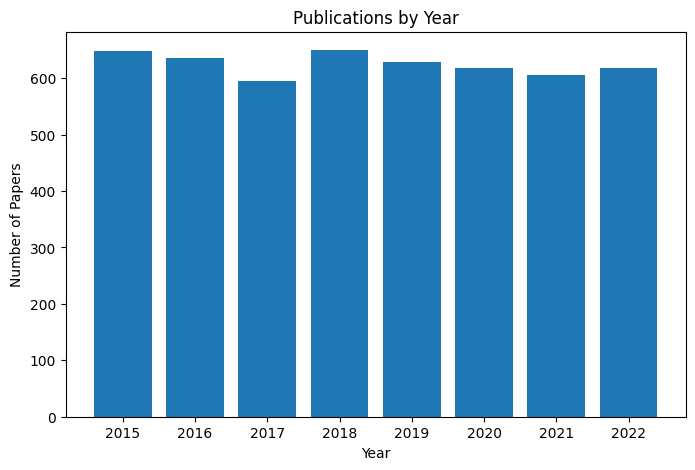

In [7]:
import matplotlib.pyplot as plt

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(year_counts.index, year_counts.values)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()


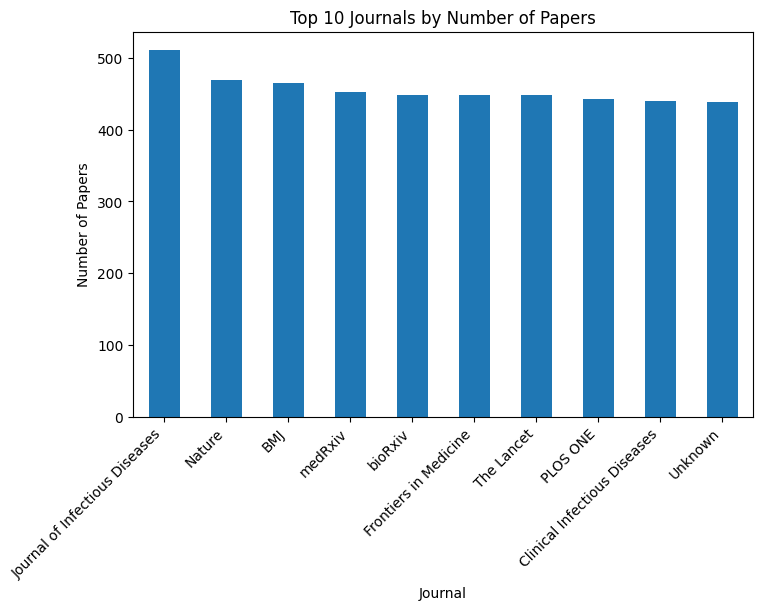

In [8]:
top_journals = df['journal'].fillna("Unknown").value_counts().head(10)

plt.figure(figsize=(8,5))
top_journals.plot(kind="bar")
plt.title("Top 10 Journals by Number of Papers")
plt.xlabel("Journal")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha="right")
plt.show()


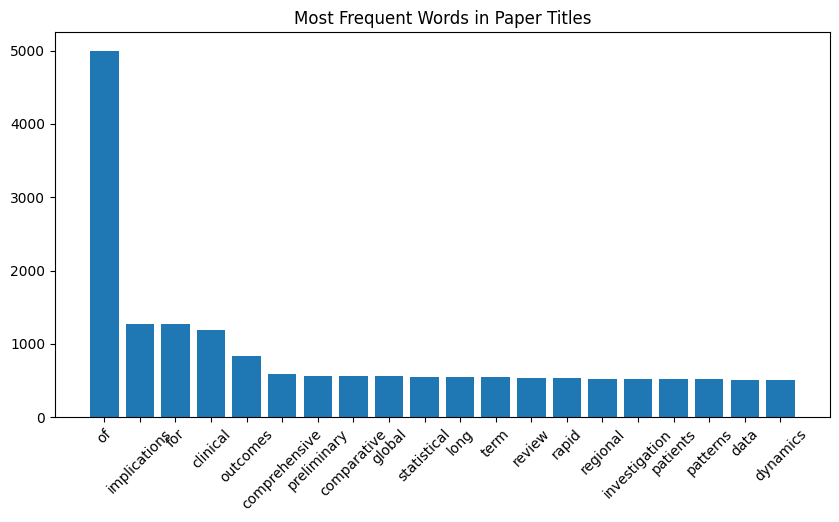

In [9]:
from collections import Counter
import re

# Join all titles into one long string
all_titles = " ".join(df['title'].dropna().astype(str))
words = re.findall(r"\b\w+\b", all_titles.lower())
common_words = Counter(words).most_common(20)

# Plot
labels, values = zip(*common_words)
plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.title("Most Frequent Words in Paper Titles")
plt.xticks(rotation=45)
plt.show()


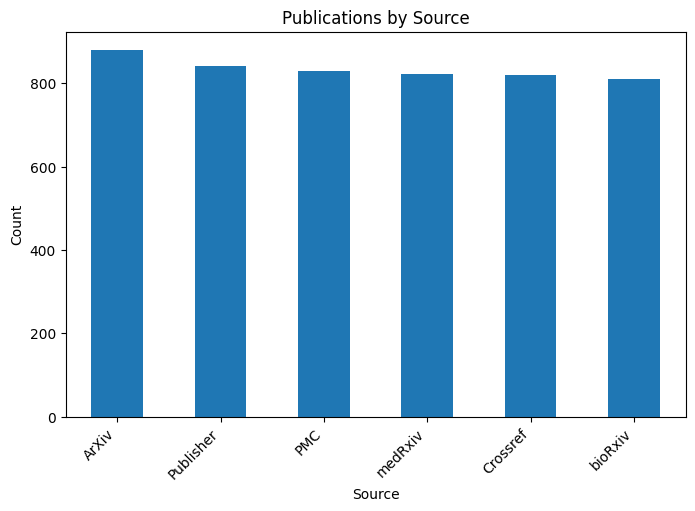

In [10]:
source_counts = df['source_x'].fillna("Unknown").value_counts()

plt.figure(figsize=(8,5))
source_counts.plot(kind="bar")
plt.title("Publications by Source")
plt.xlabel("Source")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


In [11]:
# Check column names and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cord_uid             5000 non-null   object        
 1   title                5000 non-null   object        
 2   abstract             5000 non-null   object        
 3   publish_time         5000 non-null   datetime64[ns]
 4   year                 5000 non-null   int32         
 5   authors              5000 non-null   object        
 6   journal              5000 non-null   object        
 7   source_x             5000 non-null   object        
 8   doi                  5000 non-null   object        
 9   abstract_word_count  5000 non-null   int64         
 10  title_word_count     5000 non-null   int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 410.3+ KB


In [12]:
# Count missing values in each column
df.isnull().sum()



cord_uid               0
title                  0
abstract               0
publish_time           0
year                   0
authors                0
journal                0
source_x               0
doi                    0
abstract_word_count    0
title_word_count       0
dtype: int64

In [13]:
# Summary statistics for numerical columns
df.describe()


,publish_time,year,abstract_word_count,title_word_count
count,5000,5000.000000,5000.000000,5000.000000
mean,2018-12-18 20:43:17.760000,2018.468200,65.643400,6.199800
min,2015-01-01 00:00:00,2015.000000,34.000000,5.000000
25%,2016-12-11 12:00:00,2016.000000,50.000000,5.000000
50%,2018-12-08 00:00:00,2018.000000,67.000000,5.000000
75%,2020-12-19 12:00:00,2020.000000,81.000000,9.000000
max,2022-12-29 00:00:00,2022.000000,100.000000,10.000000
std,NaN,2.295134,17.854758,2.071603


In [14]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")
csv_path = "cord19_metadata_sample_5000.csv"   # change if needed
df = pd.read_csv(csv_path, low_memory=False)
print("Loaded:", df.shape)
df.head(3)


Loaded: (5000, 11)


,cord_uid,title,abstract,publish_time,year,authors,journal,source_x,doi,abstract_word_count,title_word_count
0,c3329a03-efae-48a2-87eb-93adcb097e2f,Pandemic rapid investigation of trends : impli...,The investigation evaluates the effectiveness ...,2021-03-11,2021,Barbara Martinez; Michael Lopez; Robert Smith,Unknown,medRxiv,10.0000/910620.396,89,9
1,9c17f9cc-4d9b-4545-b131-1b0f063351fe,Coronavirus preliminary study of effectiveness,Our analysis assesses outcomes for immunity in...,2019-10-21,2019,Richard Garcia; Linda Williams; Jessica Johnso...,Unknown,medRxiv,10.0000/930555.796,89,5
2,71140558-098a-453e-af27-e494860c3895,Modeling comparative survey of effectiveness,The investigation investigates the effectivene...,2018-08-20,2018,James Johnson; Barbara Anderson; Elizabeth Bro...,Frontiers in Medicine,PMC,10.0000/189814.849,72,5


In [15]:
# quick overview
print(df.columns.tolist())
print("\nNon-null counts:")
print(df.notnull().sum().sort_values(ascending=False).head(20))
print("\nMissing counts:")
print(df.isnull().sum().sort_values(ascending=False).head(20))


['cord_uid', 'title', 'abstract', 'publish_time', 'year', 'authors', 'journal', 'source_x', 'doi', 'abstract_word_count', 'title_word_count']

Non-null counts:
cord_uid               5000
title                  5000
abstract               5000
publish_time           5000
year                   5000
authors                5000
journal                5000
source_x               5000
doi                    5000
abstract_word_count    5000
title_word_count       5000
dtype: int64

Missing counts:
cord_uid               0
title                  0
abstract               0
publish_time           0
year                   0
authors                0
journal                0
source_x               0
doi                    0
abstract_word_count    0
title_word_count       0
dtype: int64


In [16]:
# Copy so we keep original if needed
dfc = df.copy()

# 1) Date parsing & year
if 'publish_time' in dfc.columns:
    dfc['publish_time'] = pd.to_datetime(dfc['publish_time'], errors='coerce')
    dfc['year'] = dfc['publish_time'].dt.year

# 2) Fill / handle missing fields
# - If journal missing: label 'Unknown'
# - If source_x missing: 'Unknown'
# - If title/abstract missing: keep row but note missing (some records are metadata-only)
dfc['journal'] = dfc.get('journal', pd.Series()).fillna('Unknown')
dfc['source_x'] = dfc.get('source_x', pd.Series()).fillna('Unknown')
dfc['title'] = dfc.get('title', pd.Series()).fillna('')
dfc['abstract'] = dfc.get('abstract', pd.Series()).fillna('')

# 3) Remove obviously useless columns (optional). Keep a conservative list.
drop_cols = [c for c in ['sha','full_text_file','pdf_json_files','pmcid','pmid'] if c in dfc.columns]
print("Dropping cols:", drop_cols)
dfc.drop(columns=drop_cols, errors='ignore', inplace=True)

# 4) Derived columns
dfc['abstract_word_count'] = dfc['abstract'].apply(lambda t: len(str(t).split()))
dfc['title_word_count'] = dfc['title'].apply(lambda t: len(str(t).split()))

# 5) Remove exact duplicate rows if any (based on cord_uid or title+doi)
if 'cord_uid' in dfc.columns:
    before = len(dfc)
    dfc = dfc.drop_duplicates(subset=['cord_uid'])
    print("Dropped duplicates by cord_uid:", before - len(dfc))
else:
    before = len(dfc)
    dfc = dfc.drop_duplicates(subset=['title','doi'])
    print("Dropped duplicates by title+doi:", before - len(dfc))

# 6) Simple sanity: limit years to sensible range
dfc = dfc[(dfc['year'].isna()) | ((dfc['year'] >= 2000) & (dfc['year'] <= 2025))].reset_index(drop=True)

print("Cleaned shape:", dfc.shape)


Dropping cols: []
Dropped duplicates by cord_uid: 0
Cleaned shape: (5000, 11)
